In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display

/var/folders/lp/hgbg7xdj7ql_zq41nk0lt6yw0000gn/T/ipykernel_32059/3765468496.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


IMPORT DATA

In [5]:
df = pd.read_excel('../dataset/job_fix.xlsx', sheet_name=0)

In [6]:
df.head

<bound method NDFrame.head of       Sr.No.  Course Job profession Student  Linguistic  Musical  Bodily  \
0        1.0     NaN   Astronomer\n      S1          11        5      12   
1        NaN     NaN   Astronomer\n      S2          12        6      12   
2        NaN     NaN   Astronomer\n      S3          13        7      12   
3        NaN     NaN   Astronomer\n      S4          14        8      12   
4        NaN     NaN   Astronomer\n      S5          13        9      12   
...      ...     ...            ...     ...         ...      ...     ...   
3595     NaN     NaN     Technician   S3596           8        7      15   
3596     NaN     NaN     Technician   S3597           9        8      16   
3597     NaN     NaN     Technician   S3598          10        8      17   
3598     NaN     NaN     Technician   S3599           6        9      19   
3599     NaN     NaN     Technician   S3600           8        9      18   

      Logical - Mathematical  Spatial-Visualization  Inte

VISUALZATION DATA

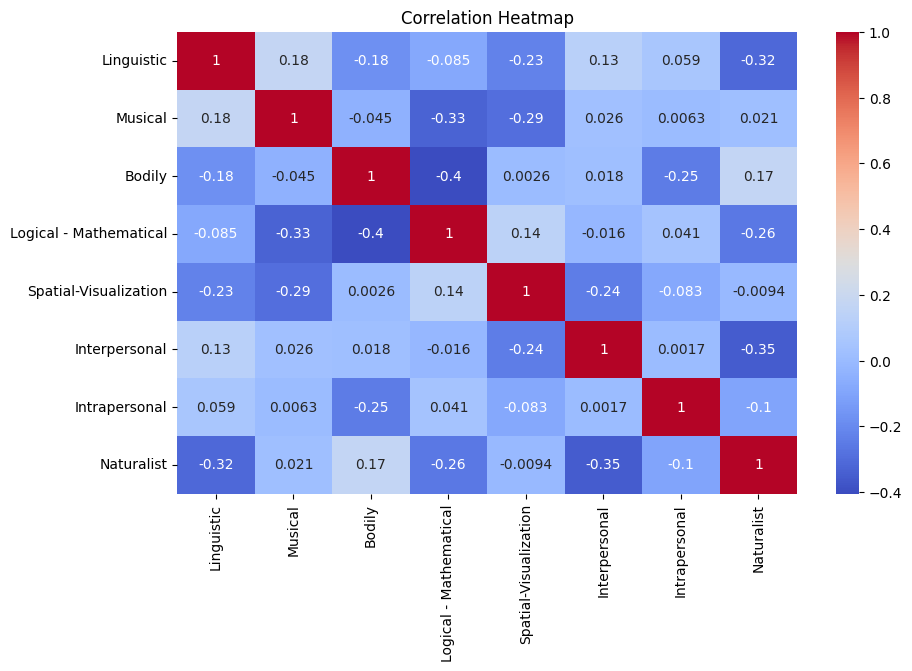

In [7]:
import seaborn as sns

corr = df.drop(columns=[
    'Sr.No.', 
    'Course', 
    'Job profession', 
    'Student',
    's/p',
    'P1',
    'P2',
    'P3',
    'P4',
    'P5',
    'P6',
    'P7',
    'P8']).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

HOLDING DATA

In [8]:
# X = df.drop(list(df.columns[0:4]) + ['s/'], axis=1)
# X = df.drop(list(df.columns[0:4]) + list(df.columns[12:]), axis=1)
X = df.drop(list(df.columns[0:13]), axis=1)
X

,P1,P2,P3,P4,P5,P6,P7,P8
0,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
1,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
2,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
3,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
4,AVG,POOR,AVG,BEST,BEST,AVG,BEST,BEST
...,...,...,...,...,...,...,...,...
3595,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG
3596,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG
3597,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG
3598,POOR,POOR,BEST,AVG,AVG,BEST,AVG,AVG


In [9]:
import pandas as pd
import numpy as np

def one_hot_encode(df_input, columns_to_encode, valid_categories):
    """
    对指定的 DataFrame 列进行手动 One-Hot 编码。

    参数:
        df_input (pd.DataFrame): 原始数据的 DataFrame。
        columns_to_encode (list): 需要进行 One-Hot 编码的列名列表。

    返回:
        pd.DataFrame: 返回一个新的 DataFrame, 其中指定的列已完成 One-Hot 编码，未编码的列保持原样。
    """
    df_encoded = df_input.copy() # 创建一个副本，以避免修改原始 DataFrame
    all_new_columns = [] # 用于存储每个已编码列的 DataFrame 列表

    for col_name in columns_to_encode:
        if col_name not in df_encoded.columns:
            continue

        unique_categories = df_encoded[col_name].unique()
        # 对类别进行排序，以确保新生成的列顺序一致（如有需要）
        # 例如：['AVG', 'BEST', 'POOR'] 可以重新排序
        unique_categories = [cat for cat in df_encoded[col_name].unique() if cat in valid_categories]
        sorted_categories = sorted(unique_categories)

        # 为当前类别新生成的列创建临时 DataFrame
        col_encoded_df = pd.DataFrame(index=df_encoded.index)

        for category in sorted_categories:
            new_col_name = f"{col_name}_{category}"
            # 将原始值与类别匹配则赋值为1，否则赋值为0
            col_encoded_df[new_col_name] = (df_encoded[col_name] == category).astype(int)
        
        all_new_columns.append(col_encoded_df)
    
    # 移除已进行编码的原始列（df_encoded 中的这些列）
    df_encoded = df_encoded.drop(columns=columns_to_encode)
    
    # 将已编码的新列拼接到原始 DataFrame
    # 使用 pd.concat 将已编码的 DataFrame 与剩余的 df_encoded 拼接起来
    if all_new_columns: # 确保有新列可以拼接
        df_encoded = pd.concat([df_encoded] + all_new_columns, axis=1)

    return df_encoded

In [23]:
cols_to_encode = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
valid_categories = ['AVG', 'BEST', 'POOR', 'NAN']
X_encoded = one_hot_encode(X, cols_to_encode, valid_categories)
X_encoded.shape
X_encoded

,P1_AVG,P1_BEST,P1_POOR,P2_AVG,P2_BEST,P2_POOR,P3_AVG,P3_BEST,P3_POOR,P4_AVG,...,P5_POOR,P6_AVG,P6_BEST,P6_POOR,P7_AVG,P7_BEST,P7_POOR,P8_AVG,P8_BEST,P8_POOR
0,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3596,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3597,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3598,0,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0


In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded_preprocessing = encoder.fit_transform(X)
X_encoded_preprocessing

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [12]:
y = df['Job profession'].values
y

array(['Astronomer\n', 'Astronomer\n', 'Astronomer\n', ..., 'Technician',
       'Technician', 'Technician'], dtype=object)

In [13]:
unique_jobs, y_encoded =  np.unique(y, return_inverse=True)
y_encoded

array([ 5,  5,  5, ..., 69, 69, 69])

SCALE DATA STANDARDIZATION

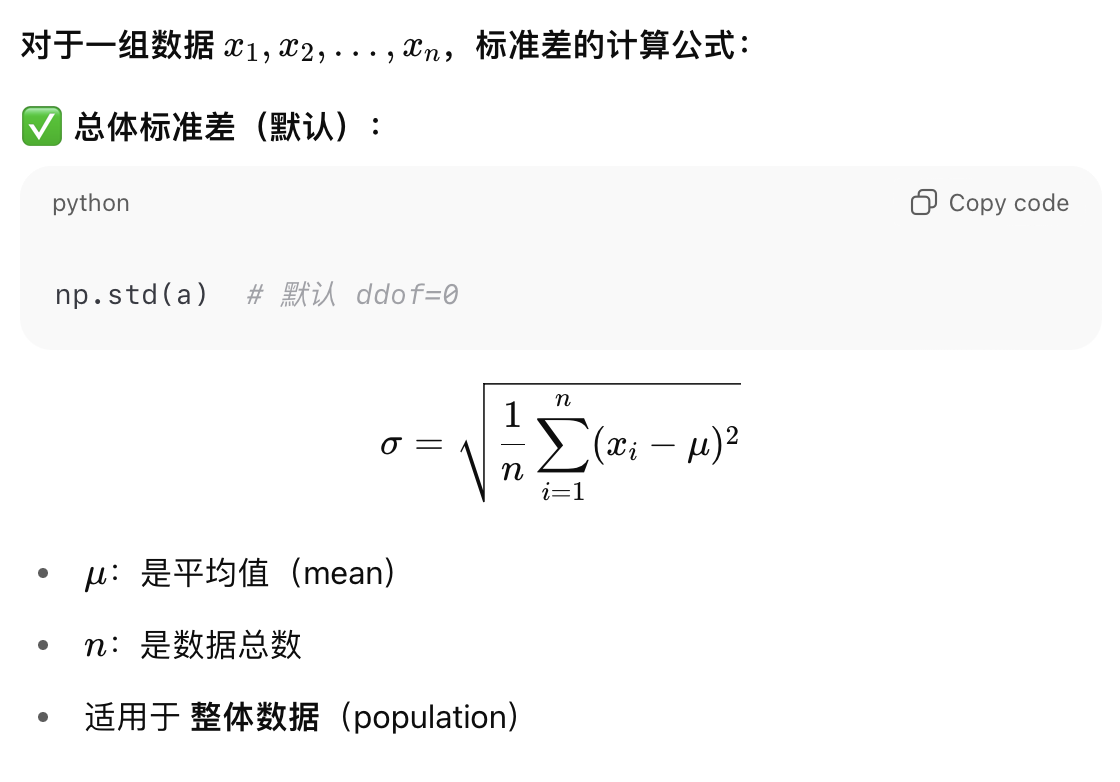

In [425]:
display(Image(filename='../photos/fomulation/std.png')) 

SCALE DATA WITH MIN MAX BASED ON BELOW COMPARING

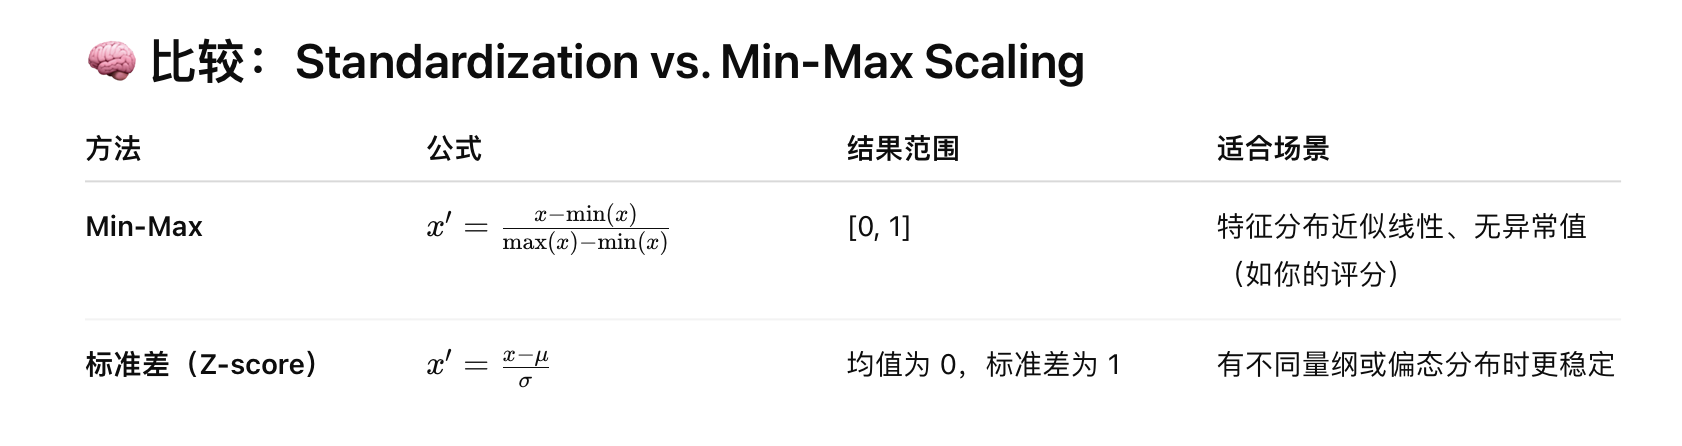

In [426]:
display(Image(filename='../photos/fomulation/compare_std_min_max_scaling.png')) 

In [14]:
X.shape

(3600, 8)

In [447]:
X.values

array([['AVG', 'POOR', 'AVG', ..., 'AVG', 'BEST', 'BEST'],
       ['AVG', 'POOR', 'AVG', ..., 'AVG', 'BEST', 'BEST'],
       ['AVG', 'POOR', 'AVG', ..., 'AVG', 'BEST', 'BEST'],
       ...,
       ['POOR', 'POOR', 'BEST', ..., 'BEST', 'AVG', 'AVG'],
       ['POOR', 'POOR', 'BEST', ..., 'BEST', 'AVG', 'AVG'],
       ['POOR', 'POOR', 'BEST', ..., 'BEST', 'AVG', 'AVG']], dtype=object)

In [370]:
def min_max_scale(X):
    """
    对二维数组 X 进行 Min-Max 缩放，每一列单独缩放到 [0, 1] 区间。
    参数:
        X: List[List[float]] 或 numpy.ndarray, n行m列
    返回:
        X_scaled: 同样大小的二维列表，每列值缩放到 [0, 1]
    """ 
    n_rows = len(X)
    n_cols = len(X[0])
    X_scaled = [[0.0 for _ in range(n_cols)] for _ in range(n_rows)]

    for col in range(n_cols):

        col_vals = [X[row][col] for row in range(n_rows)]
        col_min = min(col_vals)
        col_max = max(col_vals)
        range_val = col_max - col_min

        for row in range(n_rows):
            if range_val == 0:
                X_scaled[row][col] = 0.0   # 避免除以0
            else:
                X_scaled[row][col] = (X[row][col] - col_min) / range_val

    return np.array(X_scaled)



In [383]:
X_scaled = min_max_scale(X.values)
X_scaled

(3600, 8)

VISUALIZATION DATA

SOFTMAX REGRESSION FUNCTION

In [15]:
def softmax(Z):
    """
    计算输入数组每一列的 softmax。

    softmax 函数将原始得分(logits)转换为概率，
    通过对每一列进行指数运算并归一化实现。

    参数
    ----------
    Z : ndarray
        任意形状的 NumPy 数组。通常是一个二维数组，其中每一列
        表示一组不同类别的得分。

    返回值
    -------
    ndarray
        与 `Z` 形状相同的数组，每一列包含经过 softmax 变换后的值
        （即概率，和为 1)。

    备注
    -----
    - 此函数在 `axis=0` 方向上应用 softmax, 因此假设每一列是一个独立的得分集。
    - 如果需要在每一行上应用 softmax, 应在 `np.sum()` 中设置 `axis=1`。

    示例
    --------
    >>> Z = np.array([[1, 2, 3],
                      [1, 2, 3]])
    ...
    >>> softmax(Z)
    array([[0.5, 0.5, 0.5],
           [0.5, 0.5, 0.5]])
    """

    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [24]:
from scipy import sparse

def convert_labels(y, C):
    """
    将标签向量转换为独热编码(One-Hot Encoding)格式。

    参数
    ----------
    y : ndarray
        一维整数数组，表示类别标签。每个元素的取值应在 [0, C-1] 之间。
        例如: y = [0, 2, 1, 2]

    C : int
        总类别数(classes 的数量）。

    返回值
    -------
    Y : ndarray
        二维 NumPy 数组，形状为 (C, len(y))，每一列是 y 中对应标签的独热编码形式。
        即第 i 列是第 i 个标签的 one-hot 表示。

    示例
    --------
    >>> y = np.array([0, 2, 1])
    >>> C = 3
    >>> convert_labels(y, C)
    array([[1., 0., 0.],
           [0., 0., 1.],
           [0., 1., 0.]])

    说明
    --------
    - 使用 SciPy 的 `sparse.coo_matrix` 创建稀疏矩阵，再转换为普通 NumPy 数组。
    - 每个标签对应矩阵中的一列, one-hot 编码中对应标签的位置为 1, 其余为 0。
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

In [25]:
def cost(W, X, Y):
    """
    计算交叉熵损失(Cross-Entropy Loss)。

    该函数用于计算多类分类中的交叉熵损失，假设使用 softmax 激活函数。
    它基于模型预测值 A 和真实标签 Y 之间的差异进行计算。

    参数
    ----------
    W : ndarray
        权重矩阵，形状为 (num_features, num_classes)。

    Y : ndarray
        独热编码的真实标签矩阵，形状为 (num_classes, num_samples)。

    X : ndarray
        输入特征矩阵，形状为 (num_features, num_samples)。

    返回值
    -------
    ndarray
        损失矩阵，形状与 Y 相同，表示每个样本的逐元素交叉熵损失。
        注意：该函数**未取平均或求和**，返回的是每个元素的损失值。

    示例
    --------
    >>> W = np.random.randn(4, 3)
    >>> X = np.random.randn(4, 5)
    >>> Y = np.eye(3)[:, [0, 1, 2, 1, 0]]
    >>> cost(W, Y, X)
    array([...])  # 每个元素为 -y * log(a)

    备注
    --------
    - softmax 函数被应用于 W.T @ X 得到预测概率 A。
    - 该函数返回的是未归约（未求平均或求和）的交叉熵损失。
    - 若需计算总体损失，应加上 `.sum()` 或 `.mean()`。
    """
    A = softmax(np.dot(W.T, X))
    return -(Y * np.log(A))

GRADIENT DESCENT

In [52]:
def grad(A, X, Y):
    """
    计算 softmax 输出与真实标签之间的误差梯度，用于反向传播。

    此函数用于计算预测值 A 与真实标签 Y 之间的差值，
    并基于该误差计算梯度，以用于权重更新。

    参数
    ----------
    A : ndarray
        模型的预测概率矩阵 (softmax 输出)，形状为 (num_classes, num_samples)。

    Y : ndarray
        独热编码的真实标签矩阵，形状同 A, 为 (num_classes, num_samples)。

    返回值
    -------
    ndarray
        梯度矩阵，形状为 (num_features, num_classes),
        是输入特征 X 与误差项的乘积（注意：此函数依赖外部定义的 X)。

    示例
    --------
    >>> A = softmax(np.dot(W.T, X))
    >>> Y = one_hot_labels
    >>> grad(A, Y)
    array([...])  # 梯度值，用于更新权重

    注意事项
    --------
    - 此函数中的变量 X **未在函数内定义**，需要在函数外部预先定义。
    - E = A - Y 表示 softmax 输出与真实标签之间的误差。
    - 最终返回的是梯度: X @ E.T (注意是 X 与误差的转置相乘）。

    建议
    --------
    - 为了函数更完整与自包含，建议将 X 作为参数传入。
      如：`def grad(A, Y, X)`，避免依赖外部变量。
    """
    E = A - Y
    return np.dot(X, E.T)

SOFTMAX REFRESSION FUNCTION

In [27]:
def softmax_regression(W_init, X, Y, eta, tol=1e-4, max_count=1000000):
    
    """
    使用随机梯度下降法 (SGD) 训练 Softmax 回归模型。

    该函数以随机顺序对每个样本进行迭代训练，根据 softmax + 交叉熵损失函数
    来更新权重，直到满足收敛条件或达到最大迭代次数。

    参数
    ----------
    W_init : ndarray
        初始权重矩阵，形状为 (num_features, num_classes)。

    X : ndarray
        输入特征矩阵，形状为 (num_samples, num_features)。

    Y : ndarray
        真实标签的独热编码矩阵，形状为 (num_classes, num_samples)。

    eta : float
        学习率，用于控制梯度更新的步长。

    tol : float, 可选，默认值为 1e-4
        权重更新的收敛阈值。如果连续两次相隔 30 步的权重差小于此值，则认为已收敛。

    max_count : int, 可选，默认值为 1000
        最大迭代次数（步数）。达到此值时即使未收敛也会停止训练。

    返回值
    -------
    W : list of ndarray
        权重历史列表，每一项为一个权重矩阵，记录了训练过程中的权重更新轨迹。

    说明
    -------
    - 使用随机梯度下降 (SGD) 按样本逐个更新权重。
    - 每隔 `check_w_after` 步检查一次是否收敛（使用 L2 范数）。
    - `grad(ai, xi, yi)` 需为一个能返回梯度的函数，接受 softmax 输出、样本特征 xi 和标签 yi。
    - 输入的 X 是按样本为行，特征为列的格式，因此 `X[i, :]` 是第 i 个样本。

    示例
    --------
    >>> W_init = np.zeros((4, 3))
    >>> X = np.random.randn(100, 4)
    >>> Y = one_hot_encode(labels, num_classes=3)  # 形状为 (3, 100)
    >>> W_list = softmax_regression(W_init, X, Y, eta=0.01)
    >>> final_W = W_list[-1]
    """

    W = [W_init]
    N = X.shape[0]
    d = X.shape[1]
    C = W_init.shape[1]

    loss_history = []

    b = np.zeros((1, Y.shape[0])) # Vector bias, shape (1, C)

    count = 0
    check_w_after = 30

    while count < max_count:

        ids_mixed = np.random.permutation(N)

        for i in ids_mixed:
            
            xi = X[i, :].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            zi = np.dot(W[-1].T, xi) + b.T
            ai = softmax(zi) 

            grad_wi = grad(ai, xi, yi)
            grad_bi = ai - yi

            W_new = W[-1] - eta * grad_wi
            b_new = b - eta * grad_bi.T
            
            count += 1

            if count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-1]) < tol:
                    return W, loss_history
                

            if count % (N//2) == 0:
                Z_all = np.dot(X, W[-1]) + b
                a_all = softmax(Z_all)
                cost = -np.sum(Y * np.log(np.clip(a_all.T, 1e-10, 1.0 - 1e-10)))
                loss_history.append(cost)

            W.append(W_new)
            b = b_new
        

    return W, loss_history

In [32]:
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

In [58]:
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

GO FOR CHECK PROGRAMMING RESULT

In [59]:
C = len(unique_jobs) #class based on Y
Y = convert_labels(y_encoded, C)
Y.shape, Y

((72, 3600),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [60]:
d = X_encoded.shape[1] #features based on X
W_init = np.random.randn(d, C)
W_init.shape, np.array(X_encoded).T.shape, Y.shape

((24, 72), (24, 3600), (72, 3600))

In [63]:
g1 = grad(softmax(np.dot(W_init.T, np.array(X_encoded).T)), np.array(X_encoded).T, Y)
g2 = numerical_grad(np.array(X_encoded).T, Y, W_init, cost)

In [64]:
gap = np.linalg.norm(g1 - g2)
gap

0.00011054420577329627

In [75]:
W, losses = softmax_regression(W_init, np.array(X_encoded), Y, 0.01)

In [76]:
losses

[31457.09290460152,
 27711.887066937124,
 24850.238762115743,
 22634.53782533719,
 21046.148683702326,
 19840.527278800764,
 18982.009464535113,
 18346.82205934578,
 17877.31274466199,
 17509.7189296724,
 17228.56136339333,
 16998.26328316987,
 16811.855676387906,
 16659.652311281596,
 16532.29150667844,
 16419.36365803855,
 16326.056760435162,
 16242.766390436293,
 16169.733734522017,
 16107.012428228809,
 16049.881784189147,
 15998.056635362873,
 15952.87318600818,
 15910.040215576635,
 15873.487624539499,
 15836.390568493807,
 15804.834988456118,
 15774.772758986912,
 15746.823646530069,
 15722.5025987343,
 15698.86286355112,
 15676.806787694128,
 15655.638152794203,
 15636.716688585391,
 15618.117359504327,
 15601.417990129728,
 15585.221940138854,
 15569.637783136941,
 15554.865815623336,
 15541.670253227718,
 15528.919063724928,
 15516.088943463692,
 15504.813701788913,
 15493.261902031596,
 15482.47355511252,
 15472.354042732579,
 15462.604684021591,
 15453.016514724517,
 15444.

In [68]:
np.array(W).shape

(655140, 24, 72)

PREDICTION

In [259]:
X_predict = np.array([13, 9, 12, 16, 20, 11, 19, 19])
# Assume you have min and max for each feature (from training set)
X_predict_min = np.min(X_predict)
X_predict_max = np.max(X_predict)

# Apply min-max scaling
X_predict_scaled = (X_predict - X_predict_min) / (X_predict_max - X_predict_min)
X_predict_scaled

array([0.36363636, 0.        , 0.27272727, 0.63636364, 1.        ,
       0.18181818, 0.90909091, 0.90909091])

In [287]:
prods = softmax(np.dot(W[-1].T, X_predict_scaled))
prods

array([1.68481011e-05, 6.66344620e-04, 4.52911644e-05, 3.32598225e-06,
       3.77794824e-06, 4.39910938e-05, 6.67464418e-04, 1.25419207e-04,
       2.46786880e-04, 8.11128232e-05, 6.95855605e-06, 6.17535573e-05,
       5.10418344e-05, 3.60342685e-06, 1.15443829e-05, 3.31275191e-06,
       1.95824610e-05, 2.77562000e-04, 1.86997538e-05, 1.86936946e-05,
       1.67840161e-04, 4.98935668e-05, 5.27406469e-05, 2.21707479e-06,
       2.56887303e-06, 6.09424969e-06, 2.68039443e-05, 4.19379781e-06,
       5.18886835e-05, 1.30630018e-04, 2.34532083e-06, 8.30579585e-06,
       1.97187805e-05, 4.56699007e-05, 6.97050021e-06, 6.01468958e-07,
       1.22973422e-06, 4.18544852e-05, 1.29154890e-05, 1.49246677e-05,
       1.69099157e-03, 1.37115848e-04, 1.17255779e-05, 3.85654248e-05,
       1.38906273e-05, 4.52779101e-05, 5.26676878e-05, 2.66727314e-05,
       3.50525087e-06, 6.80499635e-06, 5.44314795e-06, 1.52817426e-05,
       8.79660706e-06, 2.32624371e-04, 3.97659222e-06, 9.93833694e-01,
      

In [463]:
y_predict = np.argmax(prods)
unique_jobs[y_predict]

'Pilot'

In [289]:
unique_jobs

array(['Actor / Actress', 'Actuary', 'Anthropologist', 'Archeologist',
       'Artist', 'Astronomer\n', 'Athlete', 'Audiologist', 'Banking',
       'Broadcaster', 'Business Analyst', 'Business manager',
       'Chartered Accountant', 'Chief financial officer',
       'Company secretary', 'Computer analyst', 'Computer programmer',
       'Consultant', 'Counselor', 'Criminologist', 'Dancer',
       'Database designer', 'Economist', 'Editor', 'Engineer',
       'Fashion Designer', 'Financial Advisor', 'Geologist',
       'Graphic Designer', 'Historian', 'Interior Decorator',
       'Internal auditor', 'Journalist', 'Language Teacher', 'Lawyer',
       'Leader', 'Librarian', 'Logistics manager', 'Manager',
       'Marine Biologist\n', 'Marketing', 'Mathematician', 'Mechanic',
       'Medical', 'Middle, Higher School Teacher and Professors',
       'Militry', 'Music teacher', 'Nature photographer',
       'Para Medical (physiotherapy, occupational theropy, audio and speech language theropy,

ACCURACY PERFORMANCE

In [510]:
def pred(W, X):
    A = softmax(np.dot(W.T, X))
    return np.argmax(A, axis=0)

In [511]:
W[-1].shape, X_scaled.shape, X.shape

((24, 72), (3600, 8), (3600, 8))

In [470]:
W[-1].shape

(24, 72)

In [519]:
result = []
maxes = []
for x in np.array(X_encoded):
    a = softmax(np.dot(W[-1].T, x.reshape(d,1)))
    result.append(np.argmax(a, axis=0)[0])
result

[29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,


In [520]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(result, y_encoded)
accuracy = accuracy * 100 
accuracy

0.0